## Doublet Singularity + Doublet in Uniform Flow

In [81]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
%run ezPlot.py

In [4]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [98]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0       # location of the doublet in x,y coordinates

In [25]:
# Create Function for Doublet Velocity and Streamlines
def get_doublet_velocity(strength, x_d, y_d, X, Y):
    u = (-strength/(2*np.pi)) * (((X - x_d)**2 - (Y-y_d)**2) / ( (X-x_d)**2 + (Y-y_d)**2)**2)
    
    v= (-strength/(2*np.pi)) * (2*(X-x_d)*(Y-y_d)) / ( (X-x_d)**2 + (Y-y_d)**2)**2
    
    return u, v
    

In [26]:
# Create Stream Function for Doublet
def get_doublet_stream(strength, x_d, y_d, X, Y):
    psi = (-strength / (2*np.pi)) * ((Y - y_d) / ( (X-x_d)**2 + (Y-y_d)**2))
    return psi

In [27]:
# Calculating Streamlines + Velocity Field of Doublet Located at Origin
u_doublet, v_doublet = get_doublet_velocity(kappa, x_doublet, y_doublet, X, Y)

psi_doublet = get_doublet_stream(kappa, x_doublet, y_doublet, X, Y)

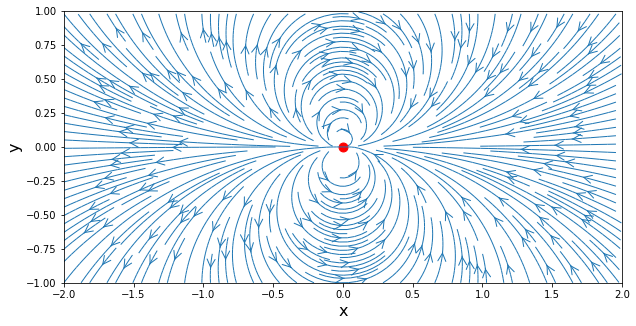

In [30]:
# Plotting Things
width = 10
height = (y_end - y_start)/(x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet, density=2.25, linewidth=1, arrowsize=2,arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o')

In [113]:
phi = (kappa / (2*np.pi)) * (X-x_doublet) / ((X-x_doublet)**2 + (Y-y_doublet)**2)

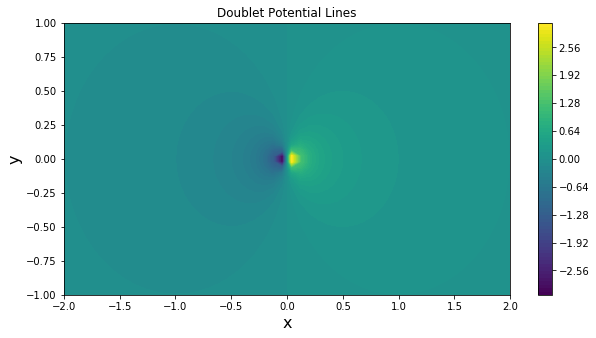

In [114]:
width = 10
height = (y_end - y_start)/(x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.contourf(X, Y, phi, 101)
plt.colorbar(cmap='hsv', extend='both')
plt.title("Doublet Potential Lines");

## Uniform Flow + Doublet Flow

In [115]:
u_inf = 1.0          # free-stream flow velocity

u_free = u_inf * np.ones((N, N), dtype='float')
v_free = np.zeros((N, N), dtype='float')

psi_free = u_inf * Y

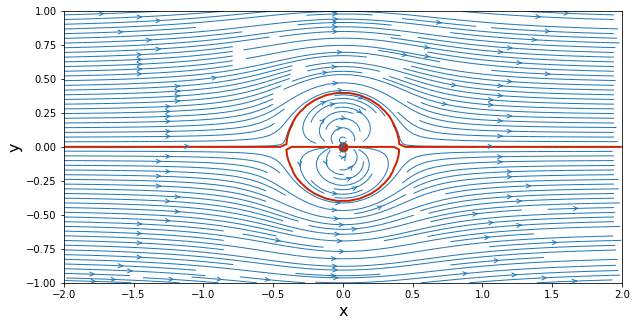

In [116]:
u = u_free + u_doublet
v = v_free + v_doublet
psi = psi_free + psi_doublet

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')


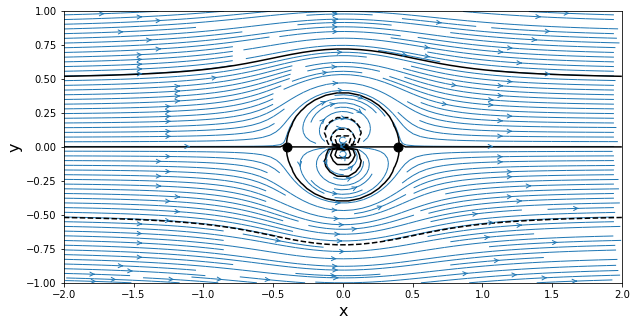

In [119]:
ezStreamline(X, Y, u, v, x_start, y_start, x_end, y_end)
plt.contour(X, Y, psi, colors = 'k')
plt.scatter(x_doublet, y_doublet, color = 'k')
# Calculate Stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# Plot Stag points
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color = 'k',
           s=80, marker='o')

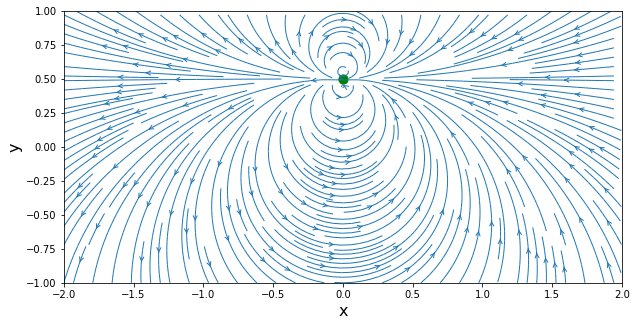

In [126]:
# Adding a Second Doublet Located at (x,y) = (0, 0.5)
x_doublet2, y_doublet2 = 0, 0.5
u_doublet2, v_doublet2 = get_doublet_velocity(kappa, x_doublet2, y_doublet2, X, Y)
psi_doublet2 = get_doublet_stream(kappa, x_doublet2, y_doublet2, X,Y)


ezStreamline(X,Y, u_doublet2, v_doublet2, x_start, y_start, x_end, y_end)
plt.scatter(x_doublet2, y_doublet2, color='g', s=85, marker='o')

## Pressure Coefficient and Bernoulli Stuff

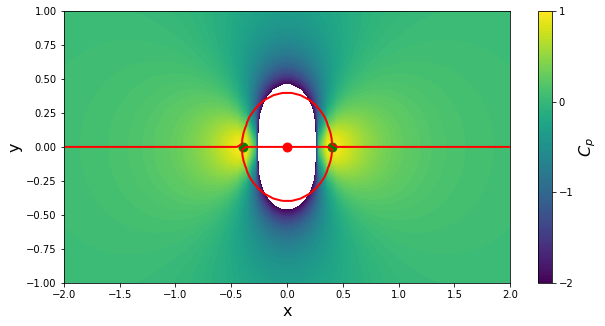

In [135]:
c_p = 1.0 - (u**2 + v**2) / u_inf**2

# plot C_p field
contf = ezContourf(X, Y, c_p, np.linspace(-2, 1, 100), x_start, y_start, x_end, y_end)
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x_doublet, y_doublet, color='r', s=80, marker='o')
plt.contour(X,Y, psi, levels=[0.], colors='r', linewidths=2,
            linestyles='solid')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], 
            color = 'g', s=80, marker='o')